<a href="https://colab.research.google.com/github/AnshulSingh-eZ/Machine_Learning_Lab_23CS067/blob/main/Exp_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')

x_train = train.drop(columns='median_house_value').values
y_train = train['median_house_value'].values

x_test = test.drop(columns='median_house_value').values
y_test = test['median_house_value'].values


from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x_train_scaled = obj.fit_transform(x_train)

ones = np.ones((x_train.shape[0], 1))
x_intercept = np.hstack((ones, x_train_scaled))
print(x_intercept)

def normaleq(x_train, y_train):
    x_transpose = x_train.T
    # theta = np.linalg.pinv(x_transpose.dot(x_train)).dot(x_transpose).dot(y_train)
    theta = np.linalg.pinv(x_transpose @ x_train) @ x_transpose @ y_train
    return theta
theta = normaleq(x_intercept, y_train)
print(theta)

def calcmse(x_train, y, theta):
  pred_y = x_train.dot(theta)
  error = pred_y - y
  loss = np.mean(error ** 2)
  return loss



[[ 1.          2.619365   -0.67152023 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 1.          2.53956878 -0.57326437 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 1.          2.4946834  -0.90546278 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [ 1.         -2.36291168  2.90780067 ... -0.16167524 -0.11760942
  -0.44666313]
 [ 1.         -2.36291168  2.88908527 ... -0.1146295  -0.06039367
  -0.99778717]
 [ 1.         -2.387848    2.29955006 ... -0.54326844 -0.60134255
  -0.45536288]]
[207300.91235294 -86499.60728226 -91744.05083061  14483.29860201
 -18263.60700749  49587.33777166 -44178.15153005  17470.57604338
  77291.55314914]


In [15]:
def gradient(X, y, theta):
    n = len(y)
    return (1 / n) * X.T.dot(X @ theta - y)

def gradient_descent(x, y, alpha=0.01, itr=10, tol=1e-6):
  n_features = x.shape[1]
  theta = np.zeros(n_features)
  loses = []
  for i in range(itr):
    grad = gradient(x,y,theta)
    theta = theta-alpha*grad
    loss = calcmse(x, y, theta)
    loses.append(loss)

    if i>0 and abs(loses[-2] - loses[-1]) < tol:
      print("Early Stop!!")
      break
  return theta, loses

In [18]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

y_train_pred = x_intercept @ theta
x_test_scaled = obj.transform(x_test)
ones_test = np.ones((x_test.shape[0], 1))
x_test_intercept = np.hstack((ones_test, x_test_scaled))
y_test_pred = x_test_intercept @ theta

print("Normal Eqn - Train Performance:")
print("MSE :", mse(y_train, y_train_pred))
print("RMSE:", rmse(y_train, y_train_pred))
print("MAE :", mae(y_train, y_train_pred))
print("R²  :", r2(y_train, y_train_pred))

print("\nNormal Eqn - Test Performance:")
print("MSE :", mse(y_test, y_test_pred))
print("RMSE:", rmse(y_test, y_test_pred))
print("MAE :", mae(y_test, y_test_pred))
print("R²  :", r2(y_test, y_test_pred))


theta_gd, losses = gradient_descent(x_intercept, y_train, alpha=0.01, itr=1000)

y_train_pred_gd = x_intercept @ theta_gd
y_test_pred_gd = x_test_intercept @ theta_gd

print("\nGradient Descent - Train Performance:")
print("MSE :", mse(y_train, y_train_pred_gd))
print("RMSE:", rmse(y_train, y_train_pred_gd))
print("MAE :", mae(y_train, y_train_pred_gd))
print("R²  :", r2(y_train, y_train_pred_gd))

print("\nGradient Descent - Test Performance:")
print("MSE :", mse(y_test, y_test_pred_gd))
print("RMSE:", rmse(y_test, y_test_pred_gd))
print("MAE :", mae(y_test, y_test_pred_gd))
print("R²  :", r2(y_test, y_test_pred_gd))


Normal Eqn - Train Performance:
MSE : 4824523173.926898
RMSE: 69458.78759326927
MAE : 50795.85711786373
R²  : 0.6413378529502689

Normal Eqn - Test Performance:
MSE : 4867205486.928865
RMSE: 69765.36022216803
MAE : 50352.228257942916
R²  : 0.6195057678311999

Gradient Descent - Train Performance:
MSE : 5132650101.902222
RMSE: 71642.51602157913
MAE : 52526.2091496474
R²  : 0.618431244034239

Gradient Descent - Test Performance:
MSE : 5149828415.410274
RMSE: 71762.30497559477
MAE : 51945.741288744866
R²  : 0.5974116946603373


/tmp/ipython-input-581776315.py:34: RuntimeWarning: overflow encountered in square
  loss = np.mean(error ** 2)
/tmp/ipython-input-1007476934.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  if i>0 and abs(loses[-2] - loses[-1]) < tol:
/tmp/ipython-input-1007476934.py:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta-alpha*grad


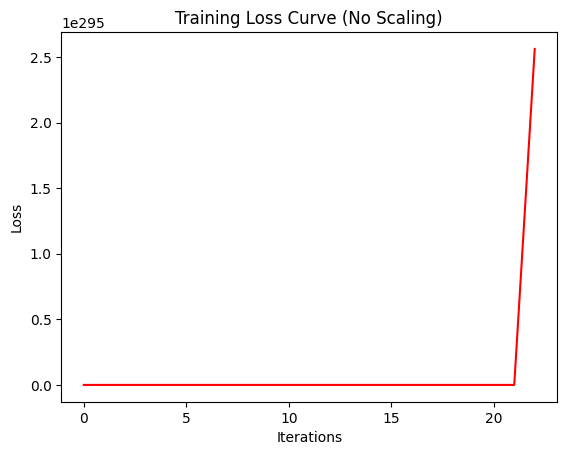

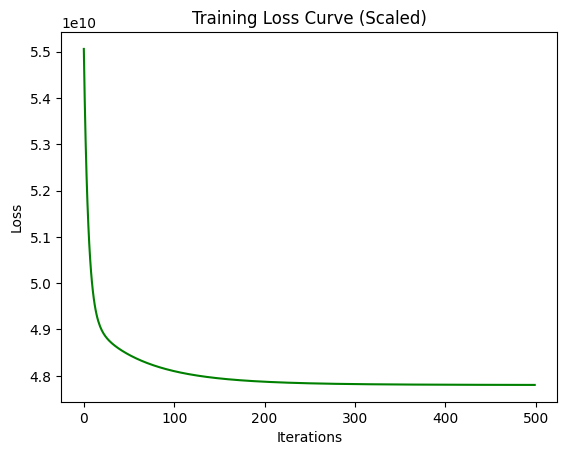

In [20]:
import matplotlib.pyplot as plt
theta, loses = gradient_descent(x_train, y_train, 0.1, 500)
plt.plot(loses, 'r')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve (No Scaling)")
plt.show()
theta, loses = gradient_descent(x_train_scaled, y_train, 0.1, 500)
plt.plot(loses, 'g')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve (Scaled)")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_test_scaled = obj.transform(x_test)
ones_test = np.ones((x_test_scaled.shape[0], 1))
x_test_intercept = np.hstack((ones_test, x_test_scaled))

lr = LinearRegression(fit_intercept=False)
lr.fit(x_intercept, y_train)
y_train_lr = lr.predict(x_intercept)
y_test_lr = lr.predict(x_test_intercept)


def print_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    print(f"{model_name} - Train:")
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    print("MSE :", mse_train)
    print("RMSE:", np.sqrt(mse_train))
    print("MAE :", mean_absolute_error(y_true_train, y_pred_train))
    print("R²  :", r2_score(y_true_train, y_pred_train))
    print()
    print(f"{model_name} - Test:")
    mse_test = mean_squared_error(y_true_test, y_pred_test)
    print("MSE :", mse_test)
    print("RMSE:", np.sqrt(mse_test))
    print("MAE :", mean_absolute_error(y_true_test, y_pred_test))
    print("R²  :", r2_score(y_true_test, y_pred_test))

print_metrics(y_train, y_train_lr, y_test, y_test_lr, "LinearRegression")


LinearRegression - Train:
MSE : 4824523173.926899
RMSE: 69458.78759326928
MAE : 50795.85711786377
R²  : 0.6413378529502689
LinearRegression - Test:
MSE : 4867205486.928866
RMSE: 69765.36022216803
MAE : 50352.22825794297
R²  : 0.6195057678311999
